# 项目：未前往就诊的挂号预约

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

本数据集包含10万条巴西预约挂号的求诊信息，研究病人是否如约前往医院就诊。每行数据录入了有关患者特点的多个数值，包括 “预约日期 (ScheduledDay)”指患者具体预约就诊的日期；“街区 (Neighborhood) ”指医院所在位置；“福利保障 (Scholarship)”说明病人是否是巴西福利项目 Bolsa Família 的保障人群等信息

### 提出问题：
### 研究问题 1：几种疾病（高血压、糖尿病、酗酒、残疾）是否对病人就诊影响很大？如果都有影响，哪个影响更大？
### 研究问题 2 年龄是否会在很大程度上影响是否就诊？年龄越大越倾向于就诊？还是因为行动不便而不去就诊？

In [1]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
# 务必包含一个‘magic word’（带有“%”的***），以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## 数据整理


### 常规属性

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。

#加载数据
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#打印前几行
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 获取的数据包含的列信息如下  
* PatientId 病人ID号  
* AppointmentID 预约ID号  
* Gender 性别  
* ScheduledDay 预约日期  
* AppointmentDay 实际就诊日期
* Age 年龄
* Neighbourhood 医院所在街区
* Scholarship 是否是福利保障人群
* Hipertension 是否高血压
* Diabetes 是否糖尿病
* Alcoholism 是否酗酒
* Handcap 是否残疾
* SMS_received 是否可以接受手机短信
* 是否如约就诊

In [3]:
#查看行列数
df.shape

(110527, 14)

In [4]:
#查看有无缺失值及其对应项
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### 数据清理（修改列名）

In [5]:
# 修改 No-show 列名 为 No_show
df.rename(columns={'No-show':'No_show'},inplace=True)

In [6]:
#查看修改结果
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## 探索性数据分析


### 研究问题 1：几种疾病（高血压、糖尿病、酗酒、残疾）是否对病人就诊影响很大？如果都有影响，哪个影响更大？

#### 高血压：只要查看没有到场的人里面有多少是患有高血压的，即可判断该因素是否会影响就诊

In [7]:
# 没有到场且不患高血压的人
absent_Hipertension = df[df['No_show'].isin(['Yes']) & df['Hipertension'].isin([0])]
# 没有到场但患有高血压的人
absent_no_Hipertension = df[df['No_show'].isin(['Yes']) & df['Hipertension'].isin([1])]

In [8]:
# 查看人数
len(absent_Hipertension)

18547

In [9]:
# 查看人数
len(absent_no_Hipertension)

3772

#### 糖尿病

In [10]:
# 没有到场且不患糖尿病的人
absent_Diabetes = df[df['No_show'].isin(['Yes']) & df['Diabetes'].isin([0])]
# 没有到场但患有糖尿病的人
absent_no_Diabetes = df[df['No_show'].isin(['Yes']) & df['Diabetes'].isin([1])]

In [11]:
# 查看人数
len(absent_Diabetes)

20889

In [12]:
# 查看人数
len(absent_no_Diabetes)

1430

#### 残疾

In [13]:
# 没有到场且不残疾的人
absent_Handcap = df[df['No_show'].isin(['Yes']) & df['Handcap'].isin([0])]
# 没有到场但残疾的人
absent_no_Handcap = df[df['No_show'].isin(['Yes']) & df['Handcap'].isin([1])]

In [14]:
# 查看人数
len(absent_Handcap)

21912

In [15]:
# 查看人数
len(absent_no_Handcap)

366

#### 酗酒

In [16]:
# 没有到场且不患糖尿病的人
absent_Alcoholism = df[df['No_show'].isin(['Yes']) & df['Alcoholism'].isin([0])]
# 没有到场但患有糖尿病的人
absent_no_Alcoholism = df[df['No_show'].isin(['Yes']) & df['Alcoholism'].isin([1])]

In [17]:
# 查看人数
len(absent_Alcoholism)

21642

In [18]:
# 查看人数
len(absent_no_Alcoholism)

677

### 整体可视化对比

<Container object of 8 artists>

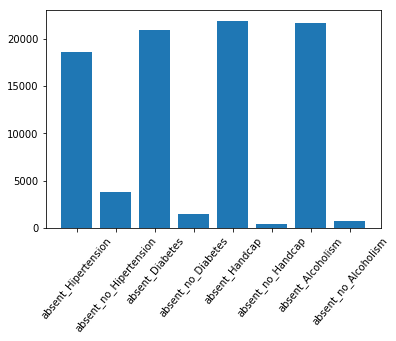

In [19]:
x=['absent_Hipertension','absent_no_Hipertension','absent_Diabetes','absent_no_Diabetes','absent_Handcap','absent_no_Handcap','absent_Alcoholism','absent_no_Alcoholism']
y=[len(absent_Hipertension),len(absent_no_Hipertension),len(absent_Diabetes),len(absent_no_Diabetes),len(absent_Handcap),len(absent_no_Handcap),len(absent_Alcoholism),len(absent_no_Alcoholism)]
plt.xticks(rotation=50)
plt.bar(range(len(x)), y,tick_label=x)

### 从图上不难看出，在没有就诊的人群中，无论是四种特征中的哪一种，都影响较明显。（若在未就诊的人群中，具有某特征的人和不具有该特征的人数量相近，则认为该特征不会影响是否就诊）。

### 同时从图上也可得出结论，残疾对就诊的影响最大。

### 研究问题 2 年龄是否会在很大程度上影响是否就诊？年龄越大越倾向于就诊？还是因为行动不便而不去就诊？

以50为分界线，查看未就诊的人群中，年龄大于50和小于等于50的人占比

In [82]:
# 未就诊的年轻人
the_absent_younger = df[df['No_show'].isin(['Yes'])& df['Age'].isin(range(1,50))]

In [99]:
# 未就诊的老年人
the_absent_older = df[df['No_show'].isin(['Yes'])& df['Age'].isin(range(50,120))]

In [100]:
# 未就诊的年轻人数量
len(the_absent_younger)

15662

In [101]:
# 未就诊的老年人数量
len(the_absent_older)

6018

In [102]:
# 样本中的年轻人总数
the_younger = df[df['Age']<=50]

In [103]:
# 样本中的老年人总数
the_older = df[df['Age']>50]

In [104]:
the_young_absent_ratio = len(the_absent_younger) / len(the_younger)

In [105]:
the_older_absent_ratio = len(the_absent_older) / len(the_older)

<Container object of 2 artists>

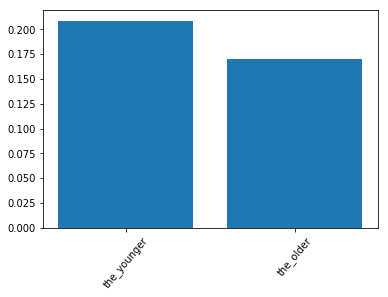

In [106]:
x=['the_younger','the_older']
y=[the_young_absent_ratio,the_older_absent_ratio]
plt.xticks(rotation=50)
plt.bar(range(len(x)), y,tick_label=x)

### 从上图可以看出，年龄对就诊影响不大。虽然在未就诊的人群中，年轻人占大多数，老年人占少数，但这忽略了样本本身年轻人和老年人总数的差异，做比后二者相差不明显。年轻但未就诊的人约占年轻人总数的22%，而老年人约占17.5%

<a id='conclusions'></a>
## 结论
### 研究问题 1：几种疾病（高血压、糖尿病、酗酒、残疾）是否对病人就诊影响很大？如果都有影响，哪个影响更大？
#### 经过探索，从图上不难看出，在没有就诊的人群中，无论是四种特征中的哪一种，都影响较明显。（若在未就诊的人群中，具有某特征的人和不具有该特征的人数量相近，则认为该特征不会影响是否就诊）。
#### 同时从图上也可得出结论，残疾对就诊的影响最大。

### 研究问题 2 年龄是否会在很大程度上影响是否就诊？年龄越大越倾向于就诊？还是因为行动不便而不去就诊？
#### 从上图可以看出，年龄对就诊影响不大。虽然在未就诊的人群中，年轻人占大多数，老年人占少数，但这忽略了样本本身年轻人和老年人总数的差异，做比后二者相差不明显。年轻但未就诊的人约占年轻人总数的22%，而老年人约占17.5%


In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255